In [1]:
import subprocess
import sys

def install_package(import_name, install_name):
    """Package installation if no packages"""
    try:
        __import__(import_name)
        print(f"{import_name} Already installed")
        return True
    except ImportError:
        print(f"{import_name} Install...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", install_name])
        print(f"{import_name} Completed")
        return True


required_packages = [
    ('numpy', 'numpy'),
    ('torch', 'torch'),
    ('sklearn', 'scikit-learn'),
    ('matplotlib', 'matplotlib'),
    ('kagglehub', 'kagglehub'),
    ('pandas', 'pandas'),
    ('seaborn', 'seaborn')
]

print("==== Check packages and install ====")
for import_name, install_name in required_packages:
    install_package(import_name, install_name)


==== Check packages and install ====
numpy Already installed
torch Already installed
sklearn Already installed
matplotlib Already installed
kagglehub Already installed


/opt/anaconda3/envs/sihun/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pandas Already installed
seaborn Already installed


In [2]:
print("\n=== Package import ===")

import subprocess
import sys
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import kagglehub
import seaborn as sns

print("\nAll packages are ready!")
print(f" - NumPy version: {np.__version__}")

import sklearn
print(f" - scikit-learn version: {sklearn.__version__}")
print(f" - PyTorch version: {torch.__version__}\n")



=== Package import ===

All packages are ready!
 - NumPy version: 1.24.3
 - scikit-learn version: 1.3.2
 - PyTorch version: 2.4.1



In [3]:
# Path setting
path = './nn2-practice1-datasets'
os.environ['KAGGLEHUB_CACHE'] = path

path = kagglehub.dataset_download('vikrishnan/boston-house-prices')
print("Path to dataset files:", path)

print("==== Downloaded dataset list ====")
files = os.listdir(path)
for file in files:
    print(f" - {file}")

# Find csv files
csv_files = [f for f in files if f.endswith('.csv')]
print(f"\n==== CSV files: {csv_files} ====")

# Dataset path setting
csv_path = os.path.join(path, 'housing.csv')

# Data load
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
                'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']  # column setting
df = pd.read_csv(csv_path, header=None, delimiter=r"\s+", names=column_names)


Path to dataset files: ./nn2-practice1-datasets/datasets/vikrishnan/boston-house-prices/versions/1
==== Downloaded dataset list ====
 - housing.csv

==== CSV files: ['housing.csv'] ====


In [4]:
print("\n=== 데이터 미리보기===")
print(df.head())

print("\n===데이터 정보===")
print(df.info())

print("\n===기초 통계===")
print(df.describe())


=== 데이터 미리보기===
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  

===데이터 정보===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    i

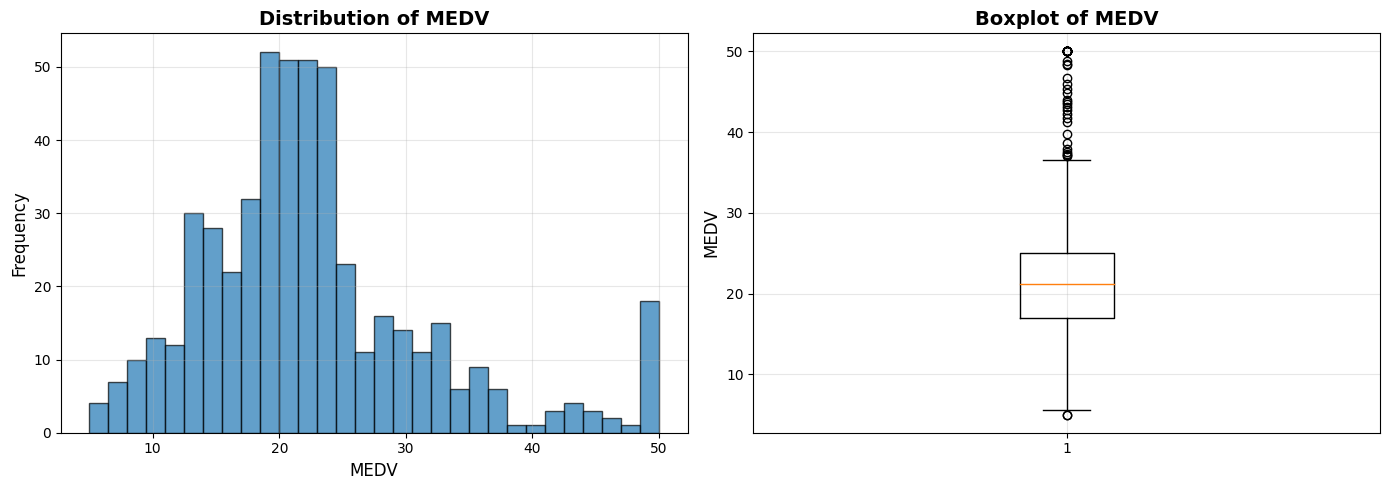

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 타겟 변수 (마지막 컬럼)
target_col = df.columns[-1]
target_data = df[target_col]

# 히스토그램
axes[0].hist(target_data, bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel(target_col, fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title(f'Distribution of {target_col}', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# 박스플롯
axes[1].boxplot(target_data, vert=True)
axes[1].set_ylabel(target_col, fontsize=12)
axes[1].set_title(f'Boxplot of {target_col}', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('eda_01_target_distribution.png', dpi=100, bbox_inches='tight')
# print("저장: eda_01_target_distribution.png")
plt.show()


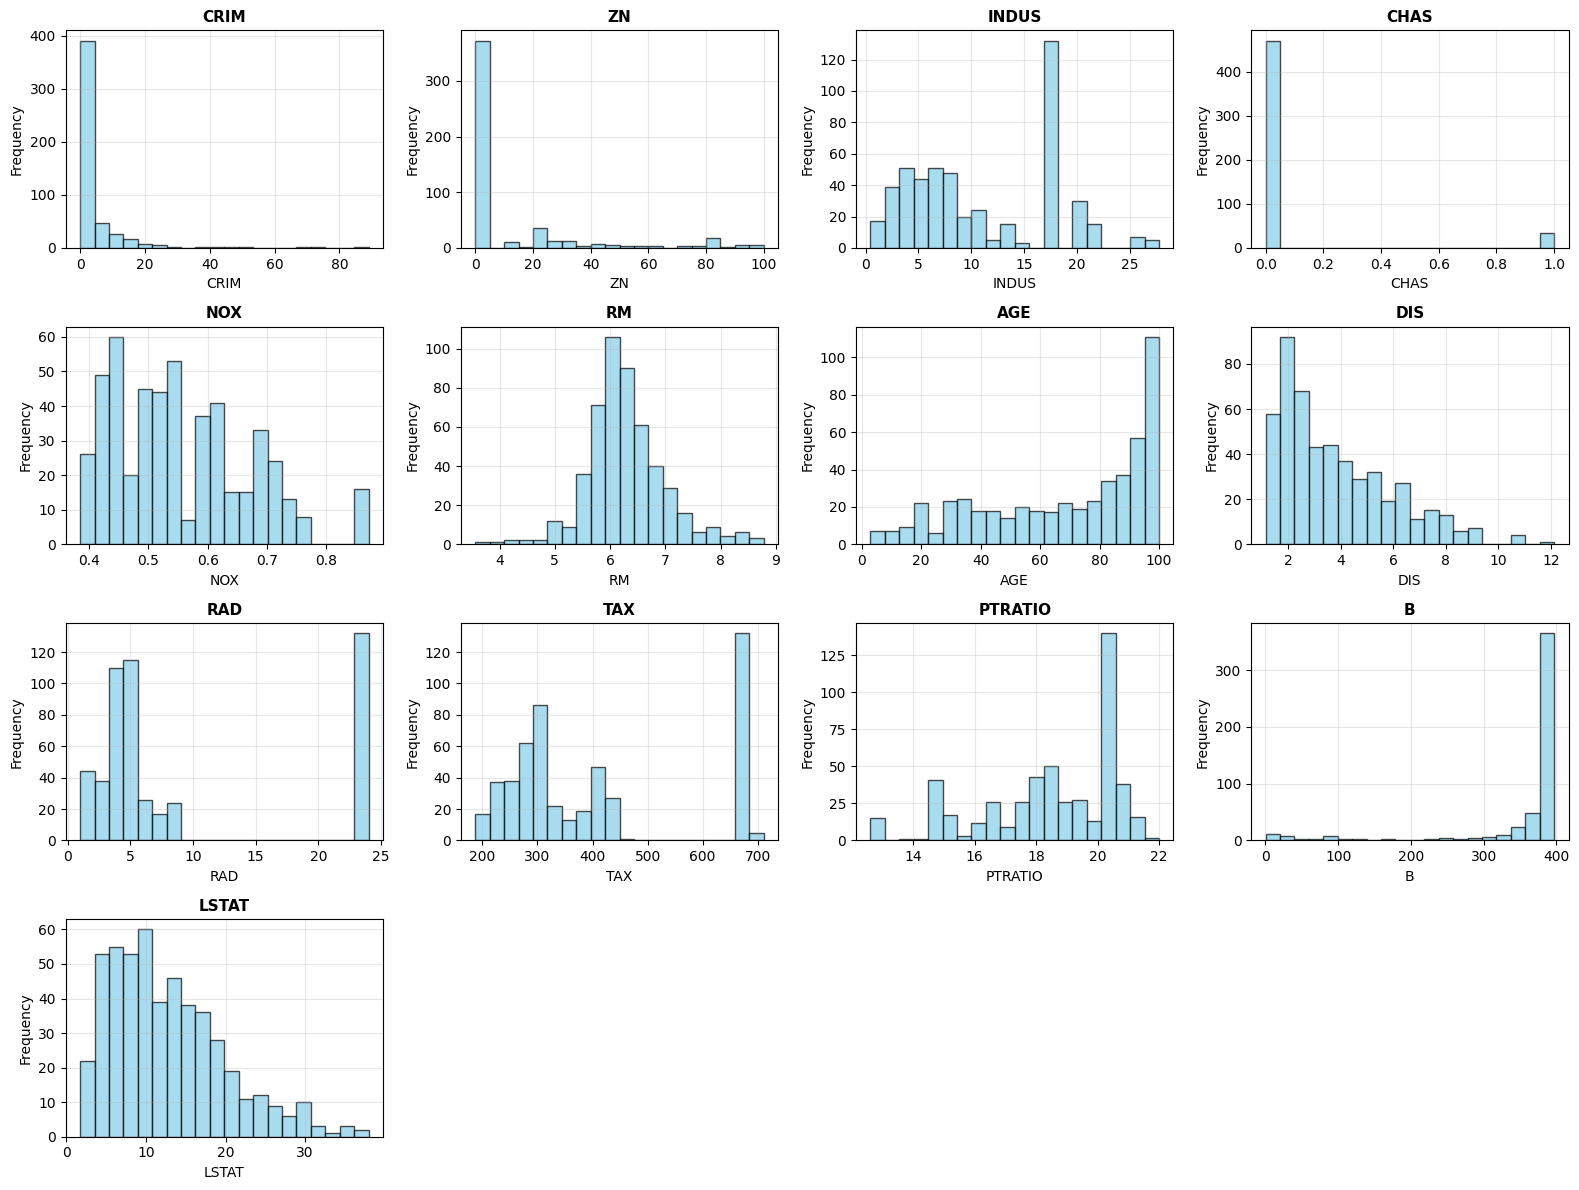

In [6]:
feature_cols = df.columns[:-1]  # 타겟 제외
n_features = len(feature_cols)
n_cols = 4
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 3))
axes = axes.flatten()

for idx, col in enumerate(feature_cols):
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(f'{col}', fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

# 남은 subplot 제거
for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
# plt.savefig('eda_02_feature_distributions.png', dpi=100, bbox_inches='tight')
# print("✔ 저장: eda_02_feature_distributions.png")
plt.show()


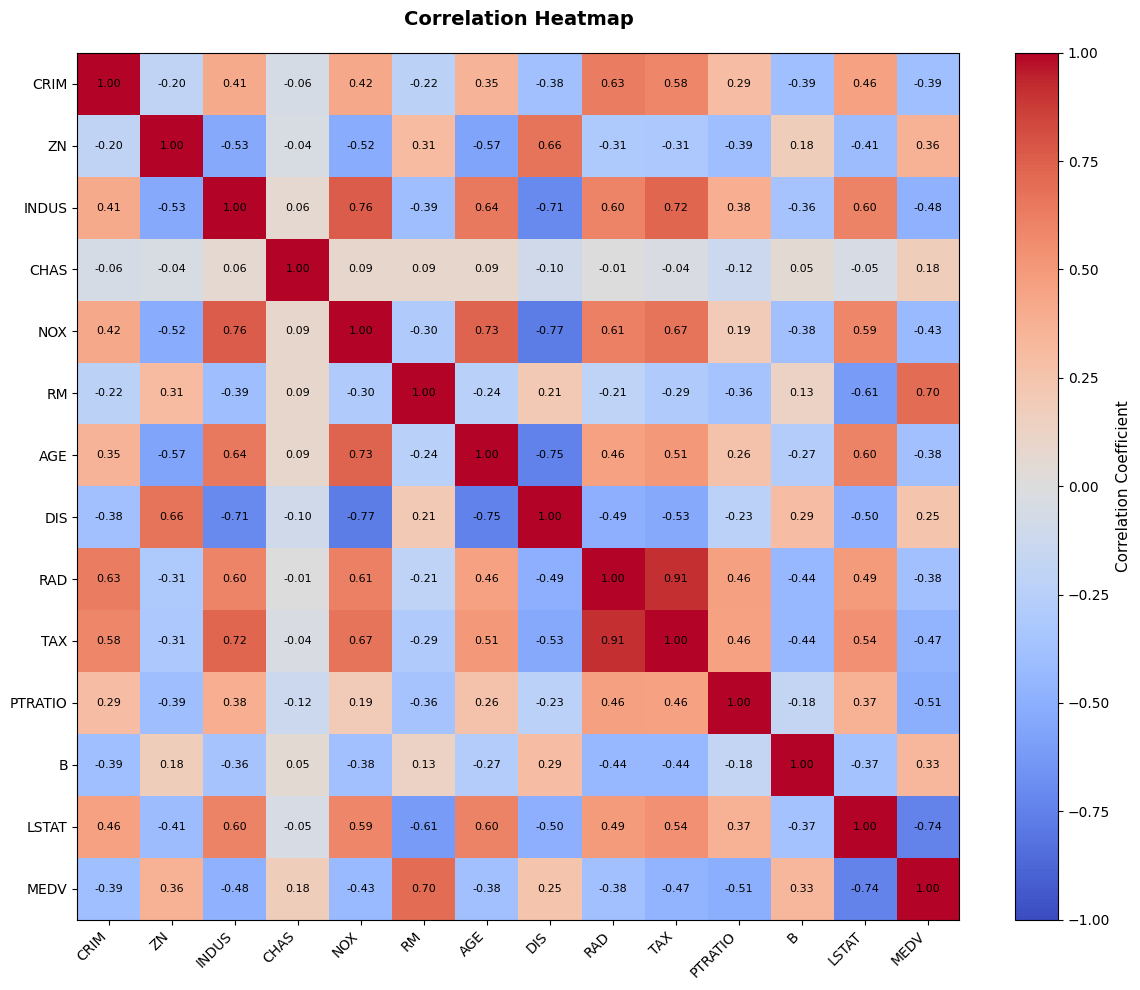

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))

# 상관계수 계산
corr_matrix = df.corr()

# 히트맵 그리기
im = ax.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)

# 축 설정
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(corr_matrix.columns, fontsize=10)

# 상관계수 값 표시
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = ax.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                       ha='center', va='center', color='black', fontsize=8)

# 컬러바
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlation Coefficient', fontsize=11)

ax.set_title('Correlation Heatmap', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
# plt.savefig('eda_03_correlation_heatmap.png', dpi=100, bbox_inches='tight')
# print("✔ 저장: eda_03_correlation_heatmap.png")
plt.show()


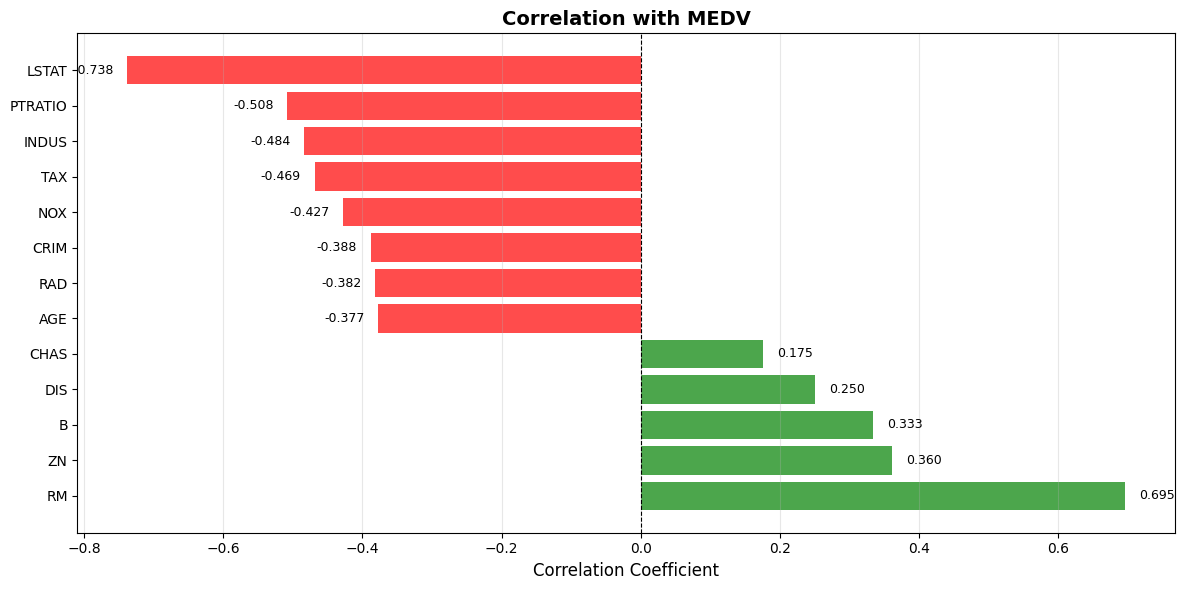

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))

# 타겟과의 상관계수
target_corr = corr_matrix[target_col].drop(target_col).sort_values(ascending=False)

# 막대그래프
colors = ['red' if x < 0 else 'green' for x in target_corr.values]
bars = ax.barh(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7)

ax.set_yticks(range(len(target_corr)))
ax.set_yticklabels(target_corr.index, fontsize=10)
ax.set_xlabel('Correlation Coefficient', fontsize=12)
ax.set_title(f'Correlation with {target_col}', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
ax.grid(True, alpha=0.3, axis='x')

# 값 표시
for i, (idx, val) in enumerate(target_corr.items()):
    ax.text(val + 0.02 if val > 0 else val - 0.02, i, f'{val:.3f}',
            va='center', ha='left' if val > 0 else 'right', fontsize=9)

plt.tight_layout()
# plt.savefig('eda_04_target_correlation.png', dpi=100, bbox_inches='tight')
# print("✔ 저장: eda_04_target_correlation.png")
plt.show()


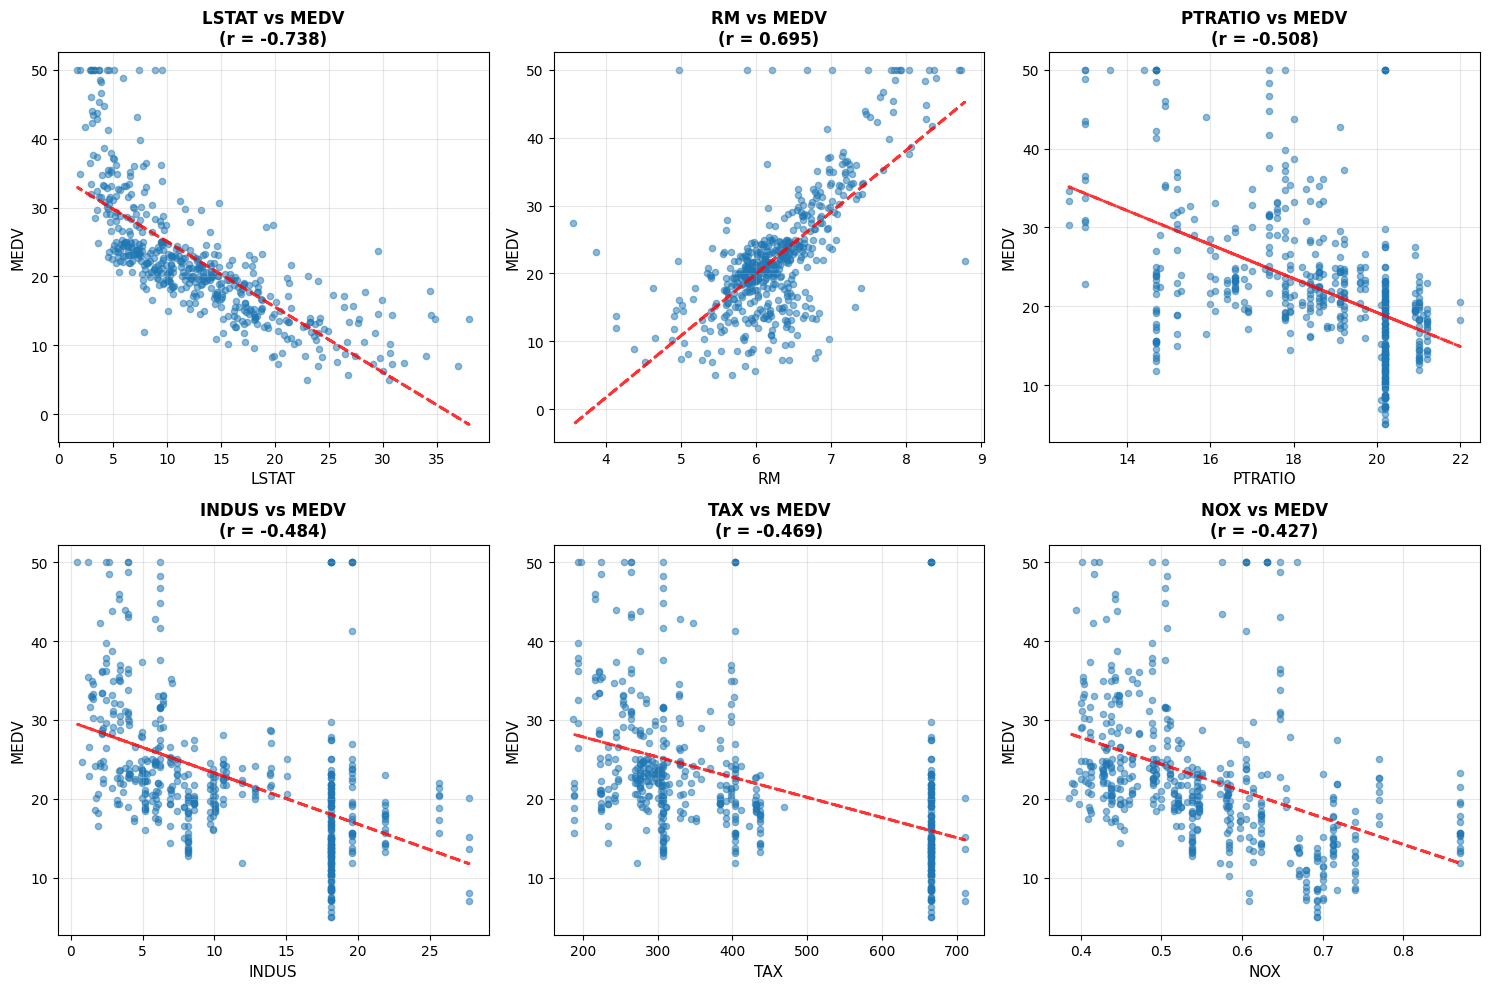

In [9]:
top_features = target_corr.abs().nlargest(6).index

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(top_features):
    axes[idx].scatter(df[feature], df[target_col], alpha=0.5, s=20)
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel(target_col, fontsize=11)
    
    # 추세선 추가
    z = np.polyfit(df[feature], df[target_col], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)
    
    # 상관계수 표시
    corr_val = corr_matrix.loc[feature, target_col]
    axes[idx].set_title(f'{feature} vs {target_col}\n(r = {corr_val:.3f})',
                        fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('eda_05_scatter_plots.png', dpi=100, bbox_inches='tight')
# print("✔ 저장: eda_05_scatter_plots.png")
plt.show()


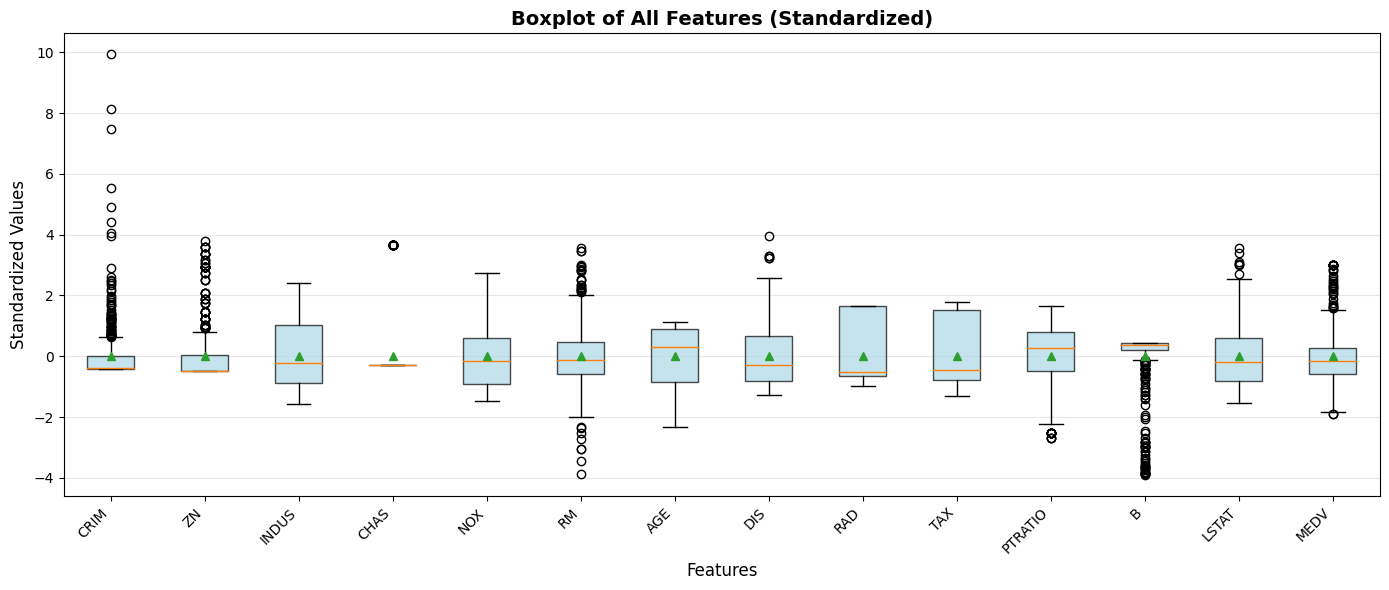

In [10]:
# 데이터 정규화 (시각화를 위해)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns
)

fig, ax = plt.subplots(figsize=(14, 6))

# 박스플롯
bp = ax.boxplot([df_scaled[col].dropna() for col in df_scaled.columns],
                labels=df_scaled.columns,
                patch_artist=True,
                showmeans=True)

# 색상 설정
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)

ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Standardized Values', fontsize=12)
ax.set_title('Boxplot of All Features (Standardized)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# plt.savefig('eda_07_boxplots.png', dpi=100, bbox_inches='tight')
# print("✔ 저장: eda_07_boxplots.png")
plt.show()



상위 5개 특성으로 Pairplot 생성 중... 


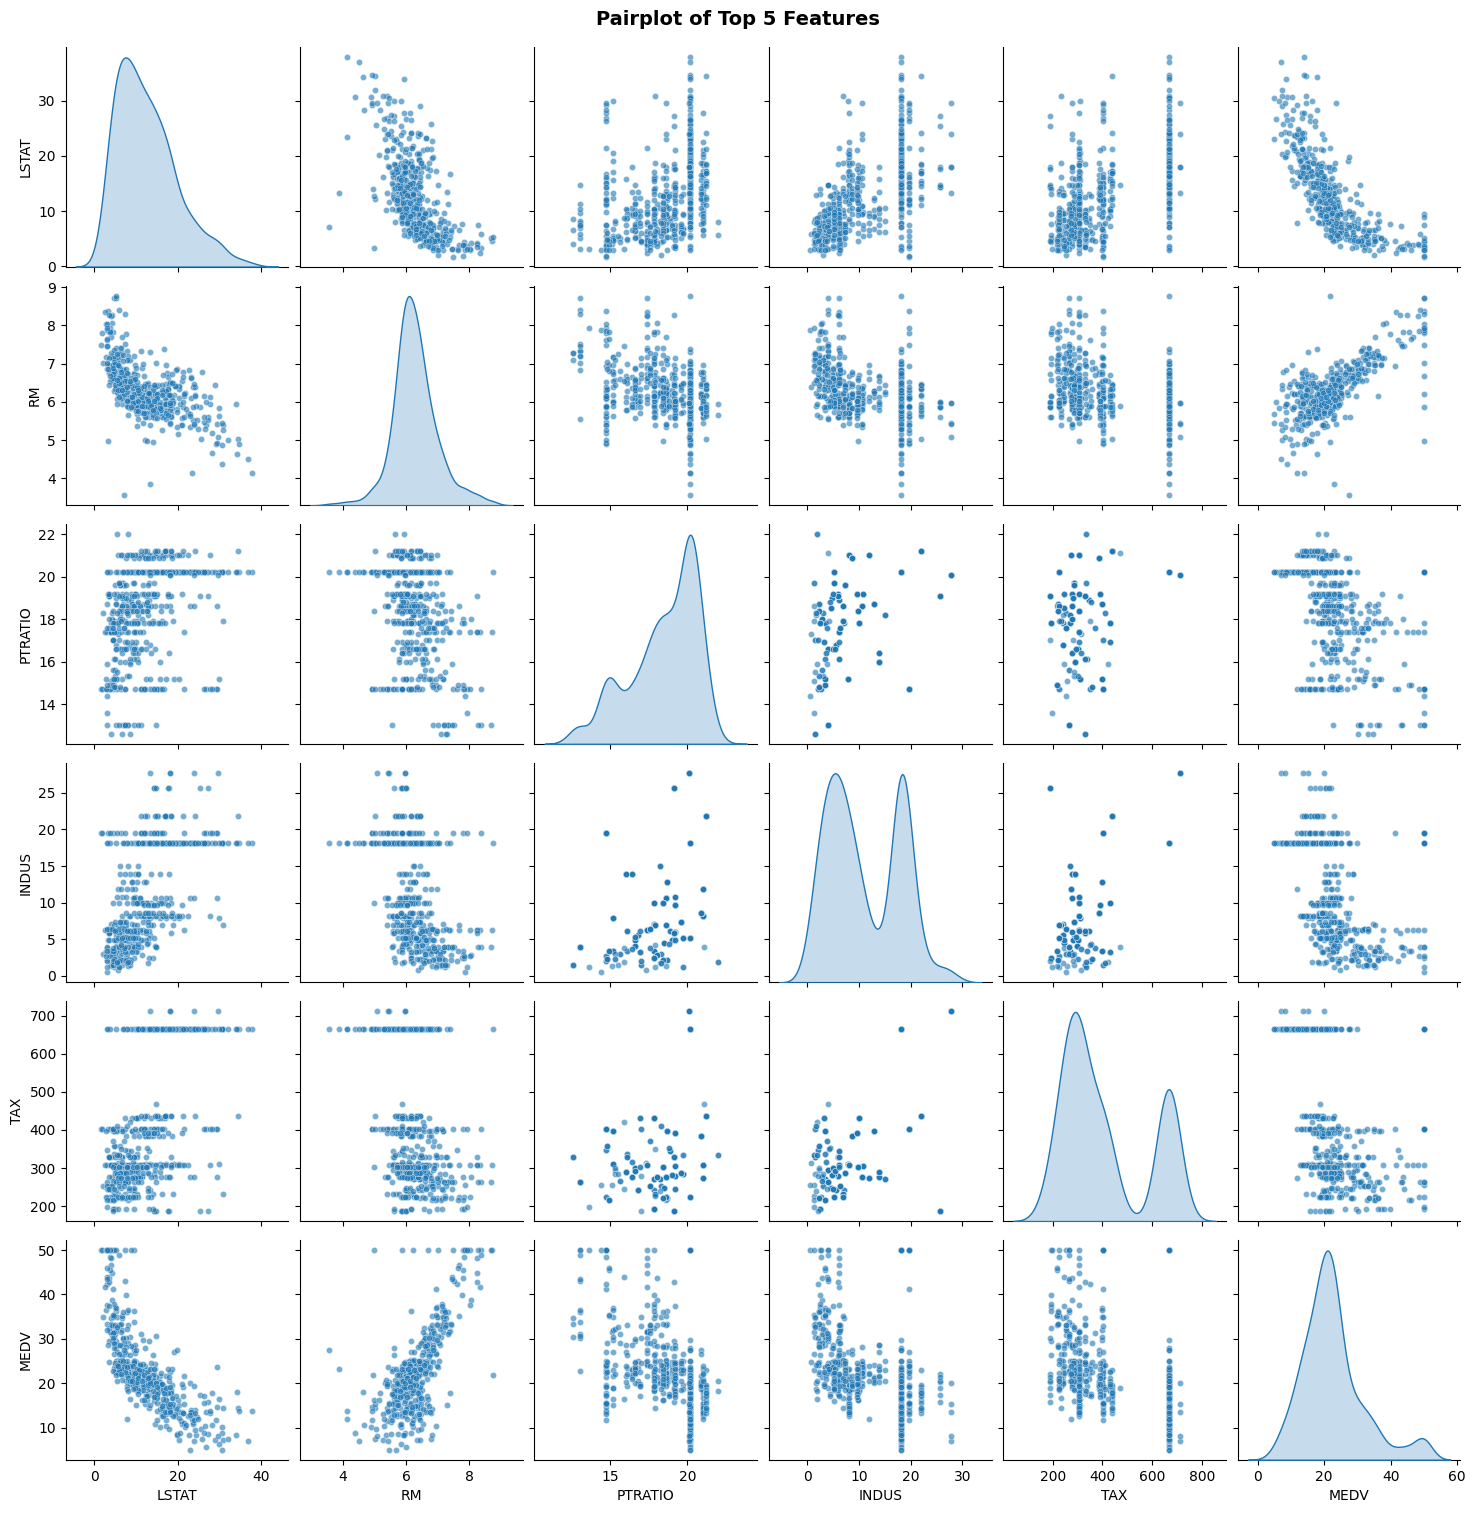

In [11]:
print("\n상위 5개 특성으로 Pairplot 생성 중... ")

top_5_features = target_corr.abs().nlargest(5).index.tolist()
plot_cols = top_5_features + [target_col]
df_subset = df[plot_cols]

sns.pairplot(df_subset, diag_kind='kde', plot_kws={'alpha': 0.6, 's': 20})
plt.suptitle('Pairplot of Top 5 Features', y=1.01, fontsize=14, fontweight='bold')
plt.savefig('eda_08_pairplot.png', dpi=100, bbox_inches='tight')
# print("✔ 저장: eda_08_pairplot.png")
plt.show()


In [12]:
X = df.iloc[:, :-1].values   # 모든 행, 마지막 컬럼 제외
y = df.iloc[:, -1].values    # 모든 행, 마지막 컬럼만

print(f" 특성(X) shape: {X.shape}")
print(f" 타깃(y) shape: {y.shape}")
print(f" 타깃 값 범위: {y.min():.2f} ~ {y.max():.2f}\n")

# Train/Test 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PyTorch 텐서로 변환
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train).reshape(-1, 1)
y_test = torch.FloatTensor(y_test).reshape(-1, 1)

print(f"Train 샘플 수: {len(X_train)}")
print(f"Test 샘플 수: {len(X_test)}\n")


 특성(X) shape: (506, 13)
 타깃(y) shape: (506,)
 타깃 값 범위: 5.00 ~ 50.00

Train 샘플 수: 404
Test 샘플 수: 102



In [13]:
class HousingMLP(nn.Module):
    def __init__(self, input_size):
        super(HousingMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


input_size = X_train.shape[1]  # 특성 개수
model = HousingMLP(input_size=input_size)

print("=== 모델 구조 ===")
print(model)
print(f"\n총 파라미터 수: {sum(p.numel() for p in model.parameters()):,}\n")


=== 모델 구조 ===
HousingMLP(
  (fc1): Linear(in_features=13, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
)

총 파라미터 수: 3,009



In [14]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
epochs = 50
batch_size = 32

train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    num_batches = 0

    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i + batch_size]
        batch_y = y_train[i:i + batch_size]

        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        num_batches += 1

    avg_train_loss = epoch_loss / num_batches
    train_losses.append(avg_train_loss)

    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test).item()
        test_losses.append(test_loss)

    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}]")
        print(f"Train Loss: {avg_train_loss:.4f}")
        print(f"Test  Loss: {test_loss:.4f}\n")


Epoch [10/50]
Train Loss: 11.6972
Test  Loss: 12.8834

Epoch [20/50]
Train Loss: 8.7722
Test  Loss: 12.0359

Epoch [30/50]
Train Loss: 7.0787
Test  Loss: 11.9566

Epoch [40/50]
Train Loss: 5.9611
Test  Loss: 11.9885

Epoch [50/50]
Train Loss: 5.2082
Test  Loss: 11.9024



In [15]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    mse = criterion(predictions, y_test).item()
    rmse = np.sqrt(mse)
    mae = torch.mean(torch.abs(predictions - y_test)).item()

    print(f"Test MSE: {mse:.4f}")
    print(f"Test RMSE: {rmse:.4f}")
    print(f"Test MAE: {mae:.4f}")

Test MSE: 11.9024
Test RMSE: 3.4500
Test MAE: 2.2191


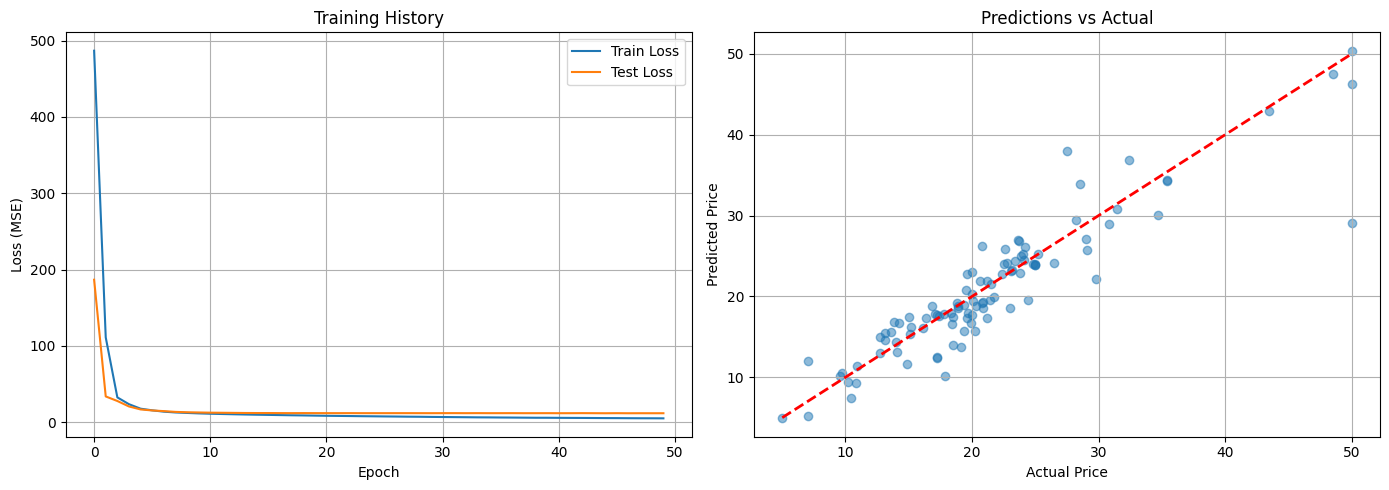

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss plot
axes[0].plot(train_losses, label='Train Loss')
axes[0].plot(test_losses, label='Test Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].set_title('Training History')
axes[0].legend()
axes[0].grid(True)

# Predicted values vs actual values
predictions_np = predictions.numpy()
y_test_np = y_test.numpy()

axes[1].scatter(y_test_np, predictions_np, alpha=0.5)
axes[1].plot([y_test_np.min(), y_test_np.max()],
             [y_test_np.min(), y_test_np.max()],
             'r--', lw=2)
axes[1].set_xlabel('Actual Price')
axes[1].set_ylabel('Predicted Price')
axes[1].set_title('Predictions vs Actual')
axes[1].grid(True)

plt.tight_layout()
# plt.savefig('boston_housing_regression.png', dpi=100)
# print("\n그래프 저장: boston_housing_regression.png")
plt.show()


In [17]:
import os

# 저장용 폴더 자동 생성
os.makedirs("nn2-practice1-models", exist_ok=True)

# 저장할 정보 설정
save_dict = {
    'model_state_dict': model.state_dict(),       # required
    'optimizer_state_dict': optimizer.state_dict(),
    'epoch': epochs,
    'train_loss': train_losses[-1],
    'test_loss': test_losses[-1],
    'input_size': input_size                      # required
}

# 모델 저장
model_path = "nn2-practice1-models/housing_model_state.pt"
torch.save(save_dict, model_path)
print(f"모델 저장 완료: {model_path}")


모델 저장 완료: nn2-practice1-models/housing_model_state.pt


In [18]:
# Checkpoint load
model_path = "nn2-practice1-models/housing_model_state.pt"
checkpoint = torch.load(model_path, map_location='cpu')

# Model re-construction
loaded_model = HousingMLP(input_size=checkpoint['input_size'])
loaded_model.load_state_dict(checkpoint['model_state_dict'])
loaded_model.eval()

print(f"모델 로드 완료")
print(f"학습 epoch: {checkpoint['epoch']}")
print(f"마지막 Train Loss: {checkpoint['train_loss']:.4f}")
print(f"마지막 Test Loss: {checkpoint['test_loss']:.4f}\n")

# Test the loaded model using the samples
with torch.no_grad():
    test_predictions = loaded_model(X_test[:5])
    print("\nTest (first 5 records):")
    for i in range(5):
        pred = test_predictions[i].item()
        actual = y_test[i].item()
        print(f"Predicted: {pred:.2f}, Actual: {actual:.2f}")


모델 로드 완료
학습 epoch: 50
마지막 Train Loss: 5.2082
마지막 Test Loss: 11.9024


Test (first 5 records):
Predicted: 26.98, Actual: 23.60
Predicted: 36.89, Actual: 32.40
Predicted: 15.65, Actual: 13.60
Predicted: 24.13, Actual: 22.80
Predicted: 16.03, Actual: 16.10


/var/folders/4b/vzqwkl_51dqf8yvvs86kd7kr0000gn/T/ipykernel_40932/1818860263.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_locat

In [19]:
def install_package(import_name, install_name):
    """Package installation if no packages"""
    try:
        __import__(import_name)
        print(f"{import_name} Already installed")
    except ImportError:
        print(f"{import_name} Install...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", install_name])
        print(f"{import_name} Completed!")

# Check packages we need
required_packages = [
    ('numpy', 'numpy'),
    ('torch', 'torch'),
    ('PIL', 'Pillow'),
    ('torchvision', 'torchvision'),
    ('sklearn', 'scikit-learn'),
    ('matplotlib', 'matplotlib')
]


In [1]:
print("\n=== Package import ===")
import subprocess
import sys
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

print("All packages are redy!\n")


=== Package import ===
All packages are redy!



In [ ]:
# 데이터 경로
data_dir = "C:/Users/user/Desktop/cat-dog"

# 이미지 파일 경로와 레이블 수집
image_paths = []
labels = []

print("\n이미지 파일 경로 수집 중...")
for filename in os.listdir(data_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        file_path = os.path.join(data_dir, filename)
        image_paths.append(file_path)

        # 파일명에서 레이블 추출
        if filename.startswith('dog'):
            labels.append(1)  # 개
        elif filename.startswith('cat'):
            labels.append(0)  # 고양이

print(f"총 {len(image_paths)}개 이미지 발견")
print(f" - 개: {sum(labels)}개")
print(f" - 고양이: {len(labels) - sum(labels)}개\n")

# Train/Test 분리 (80:20)
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42, stratify=labels
)

print(f"데이터 분리 완료:")
print(f" - Train: {len(train_paths)}개 (개: {sum(train_labels)}, 고양이: {len(train_labels) - sum(train_labels)})")
print(f" - Test: {len(test_paths)}개 (개: {sum(test_labels)}, 고양이: {len(test_labels) - sum(test_labels)})\n")



이미지 파일 경로 수집 중...
총 1942개 이미지 발견
 - 개: 957개
 - 고양이: 985개

데이터 분리 완료:
 - Train: 1553개 (개: 765, 고양이: 788)
 - Test: 389개 (개: 192, 고양이: 197)



In [ ]:
class DogCatDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        """
        Args:
            image_paths: 이미지 파일 경로 리스트
            labels: 정수 레이블 (0: 고양이, 1: 개)
            transform: 이미지 변환 함수
        """
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # 이미지 로드
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        try:
            image = Image.open(img_path).convert('RGB')

            if self.transform:
                image = self.transform(image)

            return image, label

        except Exception as e:
            # 손상된 이미지 등 오류 시 다음 이미지 로드
            print(f"Warning: 이미지 로드 실패 ({img_path})")
            return self.__getitem__((idx + 1) % len(self))


In [ ]:
# 이미지 전처리 (64x64로 리사이즈)
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Dataset 생성
train_dataset = DogCatDataset(train_paths, train_labels, transform=transform)
test_dataset = DogCatDataset(test_paths, test_labels, transform=transform)

# DataLoader 생성
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("DataLoader 생성 완료")
print(f" - Batch size: {batch_size}")
print(f" - Train batches: {len(train_loader)}")
print(f" - Test batches: {len(test_loader)}\n")


DataLoader 생성 완료
 - Batch size: 32
 - Train batches: 49
 - Test batches: 13



=== 샘플 이미지 확인 ===

✔ 샘플 이미지 저장: sample_images.png



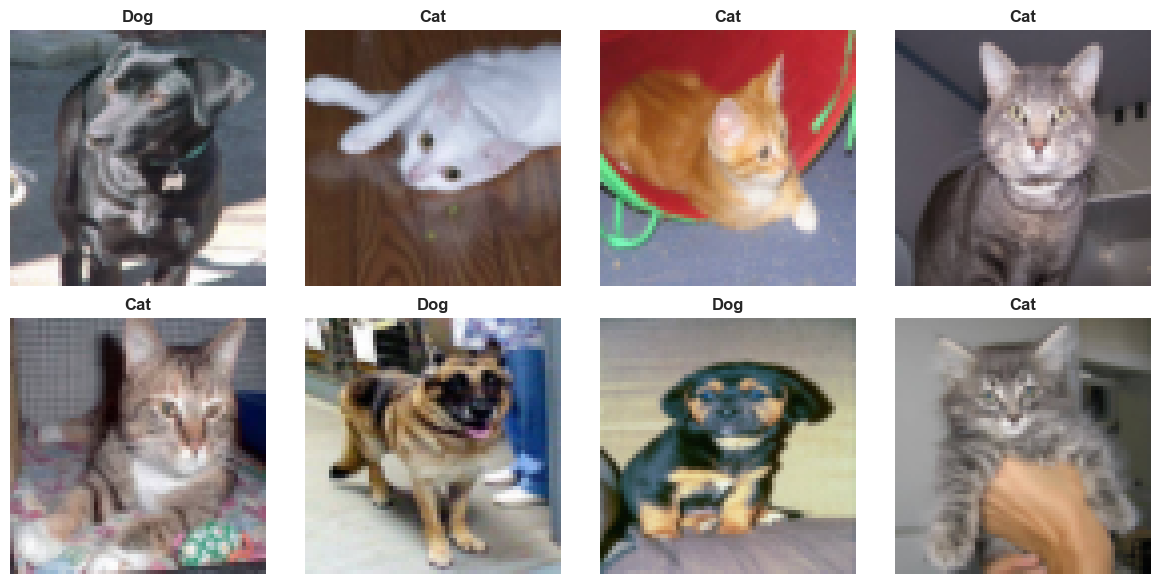

In [ ]:
print("=== 샘플 이미지 확인 ===\n")

# 샘플 이미지 가져오기
sample_images, sample_labels = next(iter(train_loader))

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for i in range(8):
    # 이미지 복원 (정규화 해제)
    img = sample_images[i].numpy().transpose(1, 2, 0)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)

    axes[i].imshow(img)
    label_name = "Dog" if sample_labels[i] == 1 else "Cat"
    axes[i].set_title(label_name, fontsize=12, fontweight='bold')
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('sample_images.png', dpi=100, bbox_inches='tight')
print("✔ 샘플 이미지 저장: sample_images.png\n")
plt.show()


In [ ]:
class DogCatMLP(nn.Module):
    def __init__(self, input_size=64*64*3):
        super(DogCatMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # 이미지를 1차원으로 펼치기
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc4(x))
        
        return x

In [ ]:
model = DogCatMLP(input_size=64*64*3)

print("모델 구조:")
print(model)


모델 구조:
DogCatMLP(
  (fc1): Linear(in_features=12288, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (sigmoid): Sigmoid()
)


In [ ]:
criterion = nn.BCELoss()  # Binary Cross Entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 30  # epoch 30 정도로 수정
train_losses = []
train_accs = []
test_losses = []
test_accs = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        labels = labels.float().unsqueeze(1)  # (batch, 1)
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        preds = (outputs >= 0.5).float()
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    model.eval()
    with torch.no_grad():
        test_loss = 0.0
        correct = 0
        total = 0

        for images, labels in test_loader:
            labels = labels.float().unsqueeze(1)
            outputs = model(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item()
            preds = (outputs >= 0.5).float()
            correct += (preds == labels).sum().item()
            total += labels.size(0)

        test_loss /= len(test_loader)
        test_acc = correct / total
        test_losses.append(test_loss)
        test_accs.append(test_acc)

    if (epoch + 1) % 5 == 0:
        print(f"[Epoch {epoch+1}/{epochs}]")
        print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2%}")
        print(f"Test  Loss: {test_loss:.4f}, Test  Acc: {test_acc:.2%}\n")


print("=" * 60)
print("학습 완료!")
print(f"최종 Test Accuracy: {test_accs[-1] * 100:.2f}%")
print("=" * 60 + "\n")

[Epoch 5/30]
Train Loss: 0.6661, Train Acc: 60.72%
Test  Loss: 0.6610, Test  Acc: 62.98%

[Epoch 10/30]
Train Loss: 0.5395, Train Acc: 73.21%
Test  Loss: 0.6553, Test  Acc: 65.04%

[Epoch 15/30]
Train Loss: 0.3743, Train Acc: 83.58%
Test  Loss: 0.7441, Test  Acc: 67.61%

[Epoch 20/30]
Train Loss: 0.2438, Train Acc: 90.73%
Test  Loss: 1.0781, Test  Acc: 61.95%

[Epoch 25/30]
Train Loss: 0.1335, Train Acc: 94.98%
Test  Loss: 1.6585, Test  Acc: 60.41%

[Epoch 30/30]
Train Loss: 0.0607, Train Acc: 98.00%
Test  Loss: 3.4608, Test  Acc: 60.15%

학습 완료!
최종 Test Accuracy: 60.15%



✔ 예측 결과 저장: predictions.png



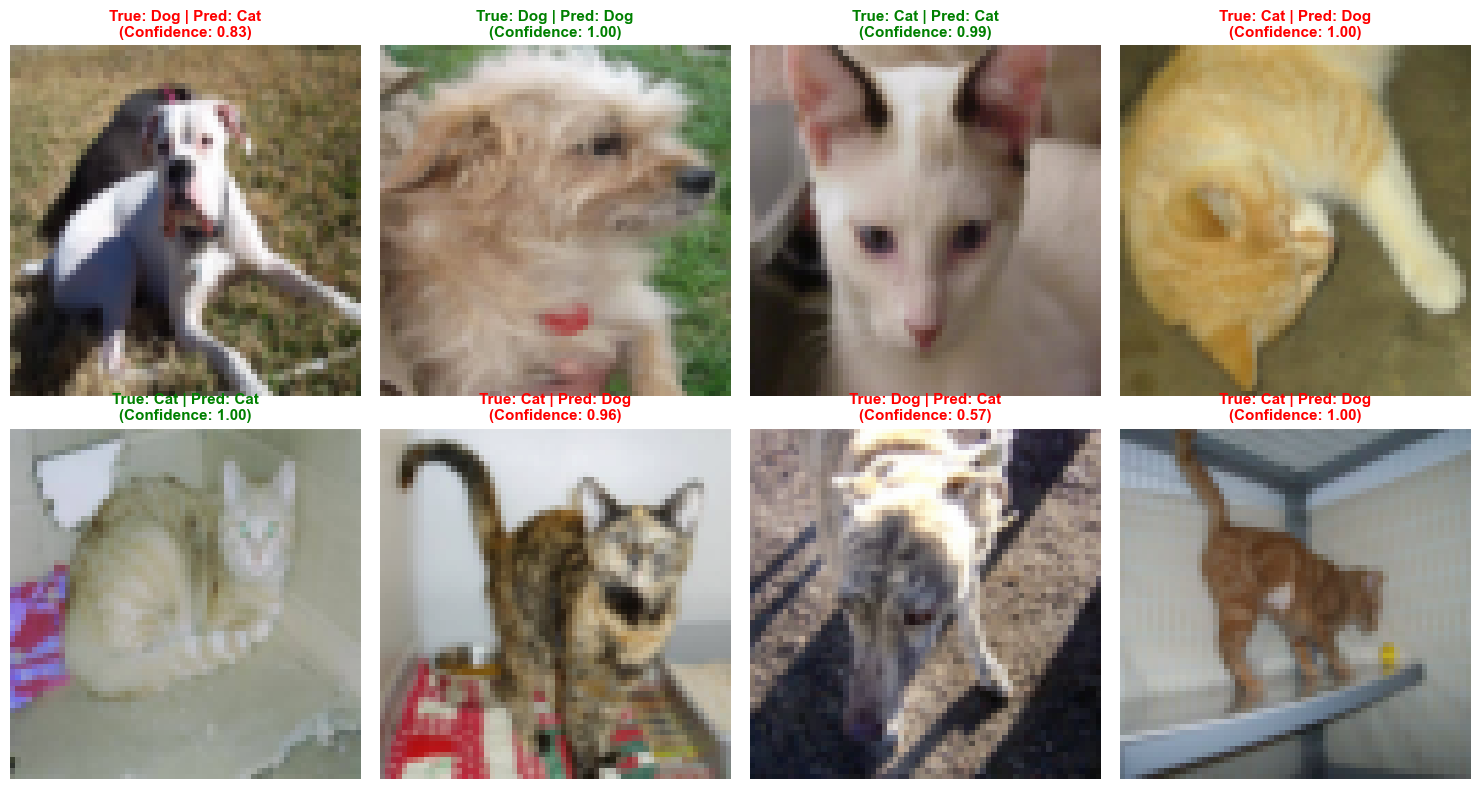

In [ ]:
model.eval()

# 테스트 이미지에서 샘플 가져오기
test_images, test_labels_batch = next(iter(test_loader))

with torch.no_grad():
    outputs = model(test_images)
    predictions = (outputs >= 0.5).float()

# 샘플 이미지 시각화
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
axes = axes.flatten()

for i in range(8):
    img = test_images[i].numpy().transpose(1, 2, 0)
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)

    axes[i].imshow(img)

    true_label = "Dog" if test_labels_batch[i] == 1 else "Cat"
    pred_label = "Dog" if predictions[i] == 1 else "Cat"
    confidence = outputs[i].item() if predictions[i] == 1 else 1 - outputs[i].item()
    color = 'green' if true_label == pred_label else 'red'

    axes[i].set_title(
        f"True: {true_label} | Pred: {pred_label}\n(Confidence: {confidence:.2f})",
        color=color, fontsize=11, fontweight='bold'
    )
    axes[i].axis('off')

plt.tight_layout()
plt.savefig('predictions.png', dpi=100, bbox_inches='tight')
print("✔ 예측 결과 저장: predictions.png\n")
plt.show()


In [ ]:
model.eval()
all_preds = []
all_labels = []
all_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        predictions = (outputs > 0.5).float()

        all_preds.extend(predictions.squeeze(1).cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        all_probs.extend(outputs.squeeze(1).cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# Confusion Matrix
tp = np.sum((all_preds == 1) & (all_labels == 1))  # True Positive
tn = np.sum((all_preds == 0) & (all_labels == 0))  # True Negative
fp = np.sum((all_preds == 1) & (all_labels == 0))  # False Positive
fn = np.sum((all_preds == 0) & (all_labels == 1))  # False Negative

accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) else 0
precision = tp / (tp + fp) if (tp + fp) else 0
recall = tp / (tp + fn) if (tp + fn) else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) else 0

print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}\n")

print("Confusion Matrix")
print(f"{'':>10} {'Predicted'}")
print(f"{'':>10} {'Cat':>6} {'Dog':>6}")
print(f"{'Actual Cat':>10} {tn:>6} {fp:>6}")
print(f"{'Actual Dog':>10} {fn:>6} {tp:>6}")


Accuracy: 0.6015 (60.15%)
Precision: 0.5869
Recall: 0.6510
F1-Score: 0.6173

Confusion Matrix
           Predicted
              Cat    Dog
Actual Cat    109     88
Actual Dog     67    125


✔ 학습 그래프 저장: training_history.png



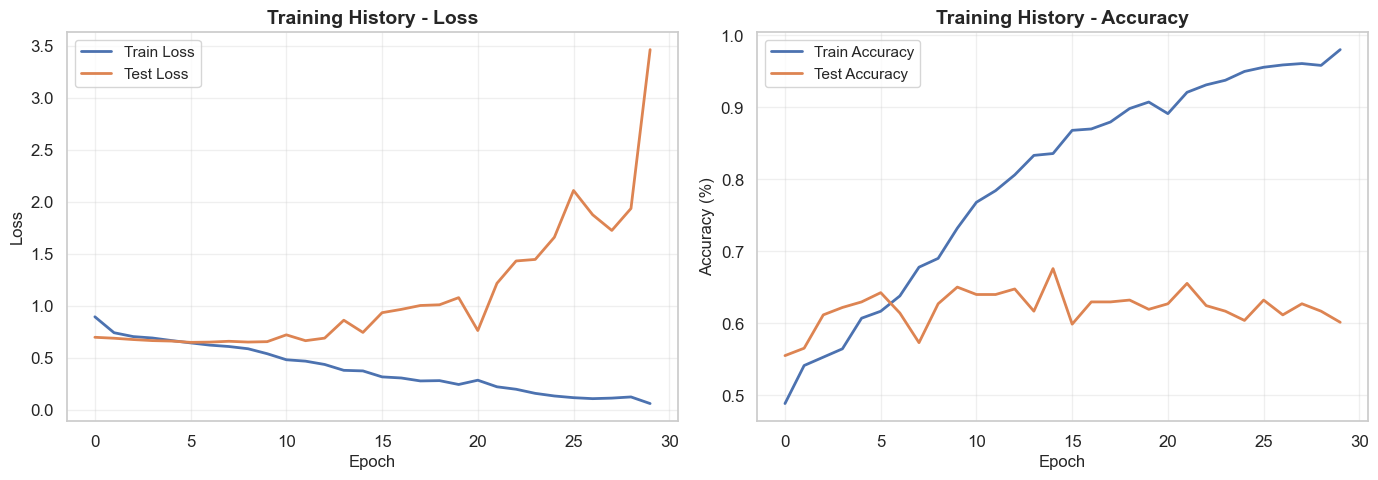

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss 그래프
axes[0].plot(train_losses, label='Train Loss', linewidth=2)
axes[0].plot(test_losses, label='Test Loss', linewidth=2)
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Loss', fontsize=12)
axes[0].set_title('Training History - Loss', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Accuracy 그래프
axes[1].plot(train_accs, label='Train Accuracy', linewidth=2)
axes[1].plot(test_accs, label='Test Accuracy', linewidth=2)
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Accuracy (%)', fontsize=12)
axes[1].set_title('Training History - Accuracy', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('training_history.png', dpi=100, bbox_inches='tight')
print("✔ 학습 그래프 저장: training_history.png\n")
plt.show()
